## Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## reading the data

##### Encoding error is occured when there is any character in a file which is not in utf-8 encoding parameter so we have change the encoding parameter we can etheir handel the exception also

In [2]:
# data=pd.read_csv("stores_sales_forecasting.csv")
# data = pd.read_csv("stores_sales_forecasting.csv", encoding='utf-8', errors='ignore')

# Open the file and ignore encoding errors
# with open("stores_sales_forecasting.csv", "r", encoding="utf-8", errors="ignore") as f:
    # Read the file content
    # content = f.read()

# Now use StringIO to treat the content as a file and load it into pandas
# import io
# data = pd.read_csv(io.StringIO(content))

data = pd.read_csv("stores_sales_forecasting.csv", encoding='ISO-8859-1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
x = data[['Country','City','Region','Sales','Quantity','Discount']]
x.head()

,Country,City,Region,Sales,Quantity,Discount
0,United States,Henderson,South,261.9600,2,0.00
1,United States,Henderson,South,731.9400,3,0.00
2,United States,Fort Lauderdale,South,957.5775,5,0.45
3,United States,Los Angeles,West,48.8600,7,0.00
4,United States,Los Angeles,West,1706.1840,9,0.20


In [6]:
y=data[['Profit']]
y.head()

,Profit
0,41.9136
1,219.5820
2,-383.0310
3,14.1694
4,85.3092


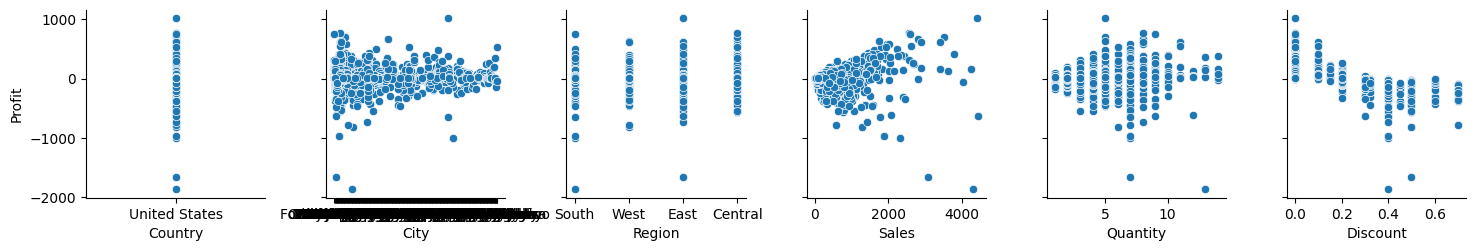

In [7]:
# Visualize what linear relationships might exist with numeric data

sns.pairplot(data, x_vars = ['Country','City','Region','Sales','Quantity','Discount'], 
                                 y_vars=['Profit']);

In [8]:
# sales
data['Sales'].describe()

count    2121.000000
mean      349.834887
std       503.179145
min         1.892000
25%        47.040000
50%       182.220000
75%       435.168000
max      4416.174000
Name: Sales, dtype: float64

In [9]:
# Quantity
data['Quantity'].describe()

count    2121.000000
mean        3.785007
std         2.251620
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [10]:
# Discount
data['Discount'].describe()

count    2121.000000
mean        0.173923
std         0.181547
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.700000
Name: Discount, dtype: float64

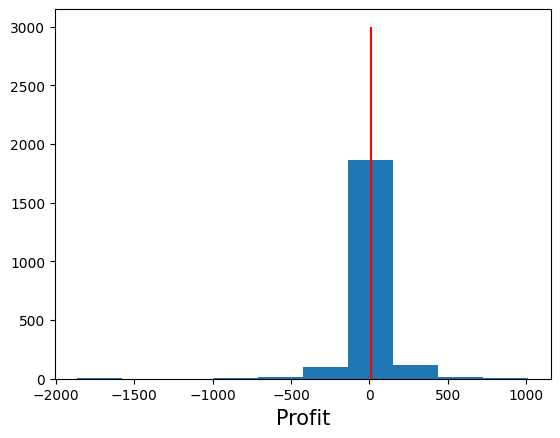

In [11]:
# Show the distribution of profit using a histogram
plt.hist(data['Profit'])
plt.xlabel('Profit', fontsize = 15);
plt.vlines(x = np.mean(data['Profit']),
                 ymin = 0,
                 ymax = 3000,
                 color = 'red');

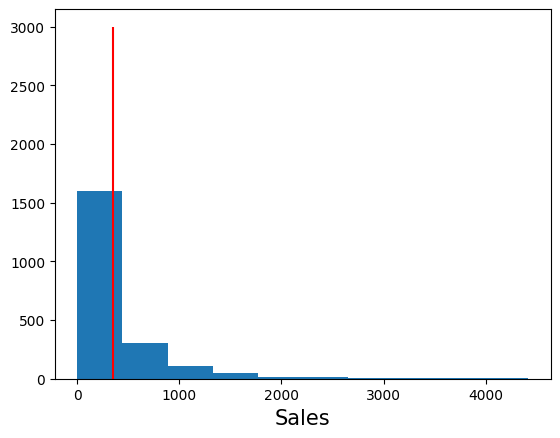

In [12]:
# Show the distribution of Sales using a histogram
plt.hist(data['Sales'])
plt.xlabel('Sales', fontsize = 15);
plt.vlines(x = np.mean(data['Sales']),
                 ymin = 0,
                 ymax = 3000,
                 color = 'red');

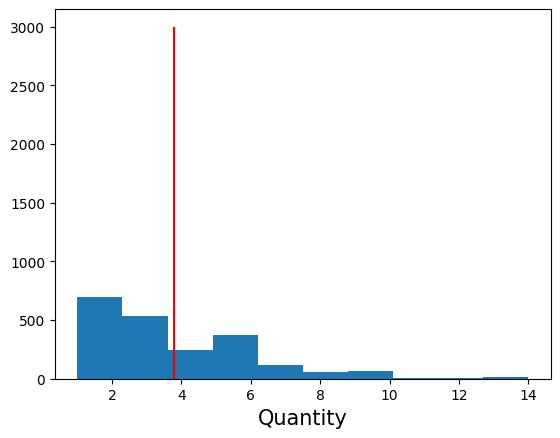

In [13]:
# Show the distribution of quantity using a histogram
plt.hist(data['Quantity'])
plt.xlabel('Quantity', fontsize = 15);
plt.vlines(x = np.mean(data['Quantity']),
                 ymin = 0,
                 ymax = 3000,
                 color = 'red');

### Modeling the data

In [14]:
# Make necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score

In [15]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [16]:
# Create X and y variables
x = data[['Sales']]
y = data[['Profit']]

In [17]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [18]:
# Cross-val score 
cross_val_score(lr, x_train, y_train, cv=5).mean()

np.float64(0.008862682057364046)

In [19]:
# Fit model
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
# Train score
lr.score(x_train, y_train)

0.024882696414294858

In [21]:
# Make predictions
preds_lr = lr.predict(x_test)

In [22]:
# Calculate residuals
resids_lr = preds_lr - y_test

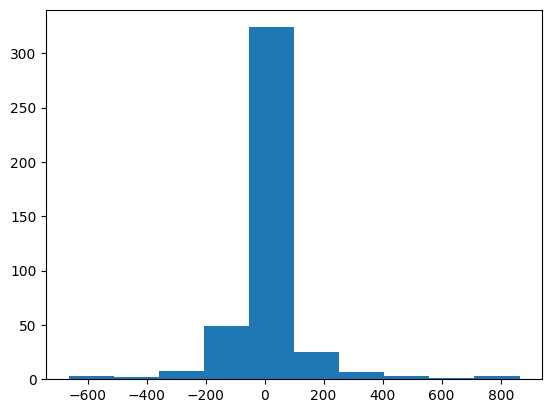

In [23]:
# Plot residuals 
plt.hist(resids_lr);

#### polynomial regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [26]:
# predicting the values
lin_reg.predict(X_poly)

array([[-7.09661983],
       [11.37583679],
       [34.51157613],
       ...,
       [-0.22567704],
       [ 4.24345865],
       [-0.60514946]])

In [27]:
# checking the score
lin_reg.score(X_poly, y)

0.07335657225585035

#### DecisionTree

In [28]:
# importing the regressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
regressor = DecisionTreeRegressor(criterion='friedman_mse')
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [36]:
regressor.predict(x_test[0:5])

array([ 12.9096, 210.594 ,   6.9708,  28.518 ,   2.2272])

In [37]:
regressor.score(x_test,y_test)

-0.768955278827067